In [54]:
import os
from matplotlib import pyplot as plt

In [55]:
def parse_statistics(stats):
    stats_list = stats.strip().split(" ")
    stats_list = [float(x) for x in stats_list]
    return stats_list

In [56]:
def create_stats_dict(dir):
    directory_path = os.path.join(os.getcwd(), dir)
    path = os.walk(directory_path)

    stats_dir = {}

    for root, _, files in path:
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    stats = f.readlines()[-1]
                    stats = parse_statistics(stats)
                    instance_number = int(file_path.split("/")[-1].split(".")[0].split("-")[-1])
                    stats_dir[instance_number] = stats[0]
    
    return stats_dir




In [57]:
def parse_stats_dict(stats_dict):
    stats_dict = {k: v for k, v in sorted(stats_dict.items(), key=lambda item: item[0])}
    keys = list(stats_dict.keys())
    values = list(stats_dict.values())
    return keys, values

In [58]:
sat_dir = "SAT/sat_solutions"
model = 'VLSIdesign'
cp_dir = f"CP/cp_solutions/{model}"

cp_stats = create_stats_dict(cp_dir)
cp_keys, cp_values = parse_stats_dict(cp_stats)

sat_stats = create_stats_dict(sat_dir)
sat_keys, sat_values = parse_stats_dict(sat_stats)

In [59]:
def plot_stats(keys, values, title, xlabel, ylabel):
    plt.plot(keys, values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

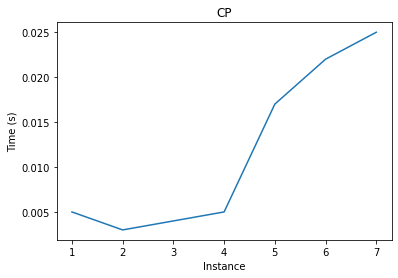

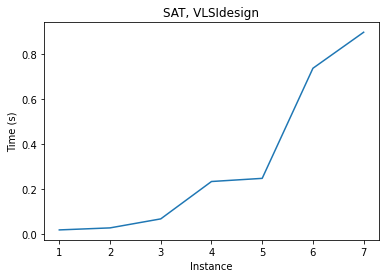

In [60]:
plot_stats(cp_keys, cp_values, "CP", "Instance", "Time (s)")
plot_stats(sat_keys, sat_values, f"SAT, {model}", "Instance", "Time (s)")